### Build a basic RNN or LSTM model for time-series prediction or text classification

### Step 1: Install Necessary Libraries

In [ ]:
tensorflow and numpy

### Step 2: Data Preparation (for Time-Series Prediction)

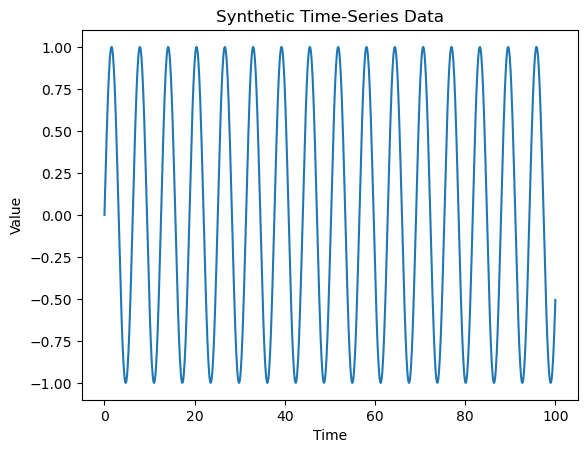

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (e.g., simple sine wave)
t = np.linspace(0, 100, 1000)
data = np.sin(t)

# Split data into training and testing
train_data = data[:800]
test_data = data[800:]

# Visualize the data
plt.plot(t, data)
plt.title("Synthetic Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


### Step 3: Preprocess Data for LSTM Model

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))

# Function to create sequences for LSTM input
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

# Define time step (number of previous time steps used for prediction)
time_step = 50

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data_scaled, time_step)
X_test, y_test = create_sequences(test_data_scaled, time_step)

# Reshape data to fit LSTM input shape (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")


Shape of X_train: (750, 50, 1), y_train: (750,)


### Step 4: Build the LSTM Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


C:\Users\Neo Dev 1\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Train the Model

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.1734 - val_loss: 0.0385
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0329 - val_loss: 0.0043
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0093 - val_loss: 0.0017
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0058 - val_loss: 7.3617e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0045 - val_loss: 2.6749e-04
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0036 - val_loss: 5.2891e-04
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0030 - val_loss: 1.2443e-04
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0035 - val_loss: 3.9287e-04
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031 - val_loss: 3.6384e-05
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0031 - val_loss: 2.5569e-04


### Step 6: Make Predictions and Evaluate the Model

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


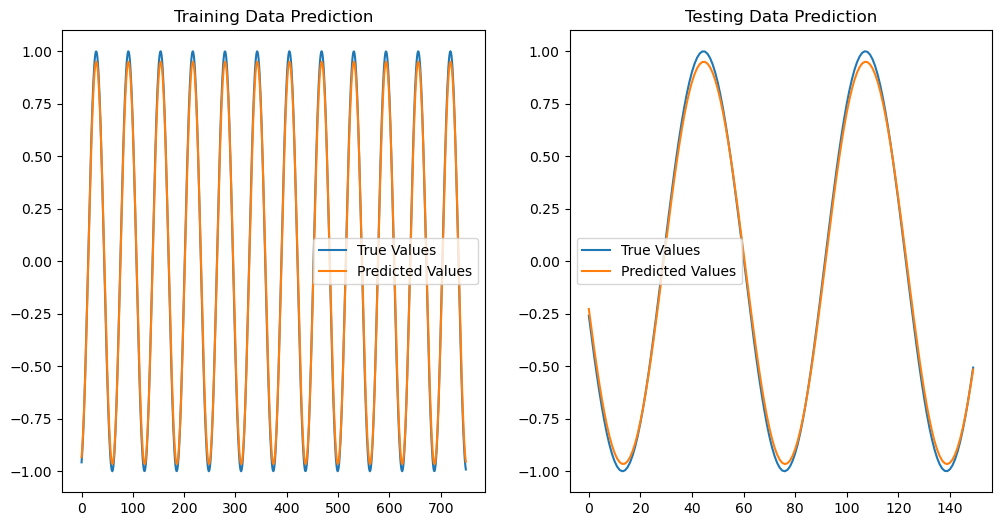

In [16]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scale the predictions and original data
train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.plot(y_train_actual, label="True Values")
plt.plot(train_predictions, label="Predicted Values")
plt.title("Training Data Prediction")
plt.legend()

# Plot testing data
plt.subplot(1, 2, 2)
plt.plot(y_test_actual, label="True Values")
plt.plot(test_predictions, label="Predicted Values")
plt.title("Testing Data Prediction")
plt.legend()

plt.show()
